In [1]:
import jax
import jax.numpy as jnp
from jax import random
from jax.scipy.integrate import trapezoid

from sim_utils import *
from clip import *
import matplotlib.pylab as plt

In [2]:
nworms = 4
box_size = 128

params = sampling_params(random.PRNGKey(0), nworms, box_size)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
params

{'L': Array([43.086216, 36.645313, 34.156208, 41.798923], dtype=float32),
 'A': Array([0.99339277, 1.0792781 , 1.1178004 , 0.9703278 ], dtype=float32),
 'T': Array([0.57948554, 0.6586126 , 0.74894655, 0.7826692 ], dtype=float32),
 'kw': Array([4.14773  , 5.6099415, 2.843915 , 3.4405828], dtype=float32),
 'ku': Array([2.2803974, 3.0517597, 4.7610183, 3.3255749], dtype=float32),
 'inc': Array([0.85100734, 1.4250113 , 1.0710055 , 4.3312488 ], dtype=float32),
 'dr': Array([0.44553643, 0.36233962, 0.6502103 , 0.31997785], dtype=float32),
 'phase_1': Array([0.14201532, 5.376521  , 0.1882602 , 5.503852  ], dtype=float32),
 'phase_2': Array([4.529222  , 0.34904656, 6.171592  , 3.4905696 ], dtype=float32),
 'phase_3': Array([ 0.00651327, -0.1851805 , -0.10317023,  0.05226613], dtype=float32),
 'alpha': Array([8.258242 , 8.751446 , 3.5973513, 3.320312 ], dtype=float32),
 'x0': Array([ 19.090149,  27.572372, -22.159218, -16.562302], dtype=float32),
 'y0': Array([-20.645607,  27.143166, -29.634949

In [4]:
# print all shapes in params
for k, v in params.items():
    print(k, v.shape)

L (4,)
A (4,)
T (4,)
kw (4,)
ku (4,)
inc (4,)
dr (4,)
phase_1 (4,)
phase_2 (4,)
phase_3 (4,)
alpha (4,)
x0 (4,)
y0 (4,)


In [5]:
params['L'].shape

(4,)

In [6]:
duration = 9.55
# snapshots = 30
# kpoints = 49
snapshots = 10
kpoints = 12
# worm = worm_simulation(params, duration, snapshots, kpoints)
sim_fn = partial(
    worm_simulation,
    duration=duration,
    snapshots=snapshots,
    kpoints=kpoints,
)
# disable jit
with jax.disable_jit():
    X = jax.vmap(sim_fn, out_axes=1)(params)
    X = X + box_size // 2

(12, 2)
()


In [7]:
X.shape

(10, 4, 12, 2)

In [8]:
X[0, 0, :, :]

Array([[ 43.948368  , -23.055866  ],
       [ 43.53225   , -19.48954   ],
       [ 43.531998  , -15.899025  ],
       [ 44.069336  , -12.348942  ],
       [ 45.16772   ,  -8.930553  ],
       [ 46.752205  ,  -5.708561  ],
       [ 48.677387  ,  -2.677803  ],
       [ 50.763428  ,   0.24456787],
       [ 52.817535  ,   3.1894722 ],
       [ 54.63872   ,   6.28384   ],
       [ 56.024513  ,   9.596149  ],
       [ 56.798923  ,  13.102158  ]], dtype=float32)

In [9]:
clip = convert_to_clip(X, box_size)

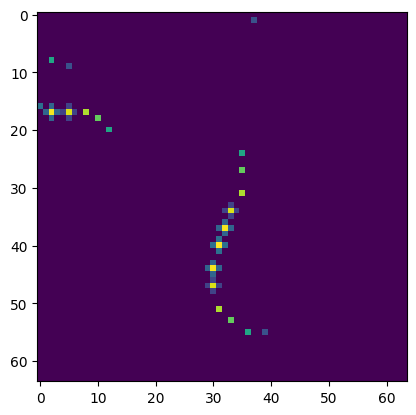

In [18]:
plt.imshow(clip[5])